<h1 style="text-align:center; color:black;"><b>Data Analysis Python Project- Blinkit Analysis</b></h1>

<h3 style="text-align:left; color:black;"><b>Import Required Libraries</b></h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="text-align:left; color:black;"><b>Load the Dataset</b></h3>

In [3]:
df = pd.read_csv('blinkit_data.csv')

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


<h3 style="text-align:left; color:black;">Explore  the Dataset<b></b></h1>

In [5]:
df.shape

(8523, 12)

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<h3 style="text-align:left; color:black;"><b>Data Cleaning</b></h3>

In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg': 'Regular'})
                                                         

In [9]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


<h3 style="text-align:left; color:black;"><b>BUSINESS REQUIREMENTS</b></h3>

<h3 style="text-align:left; color:black;"><b>KPI's REQUIREMENTS</b></h3>

In [19]:
#Total Sales
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.0f}")  

#Average Sales
avg_sales = df['Sales'].mean()
print(f"Average Sales:${avg_sales:,.0f}")

#No.of items sold
no_of_item_sold = df['Sales'].count()
print(f"No.of items sold: ${no_of_item_sold:,.0f}")

#Average Ratings 
avg_ratings = df['Rating'].mean()
print(f"Average Ratings: ${avg_ratings:,.0f}")


Total Sales: $1,201,681
Average Sales:$141
No.of items sold: $8,523
Average Ratings: $4


<h3 style="text-align:left; color:black;"><b>CHARTS REQUIREMENTS</b></h3>

<h5 style="text-align:left; color:black;"><b>Total Sales by Fat Content</b></h5>

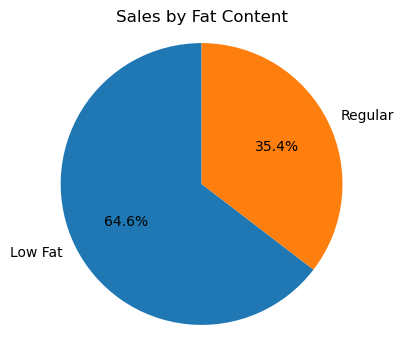

In [28]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_fat, labels= sales_by_fat.index,
       autopct= "%.1f%%",
       startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

<h5 style="text-align:left; color:black;"><b>Toatal Sales by Item Type</b></h5>

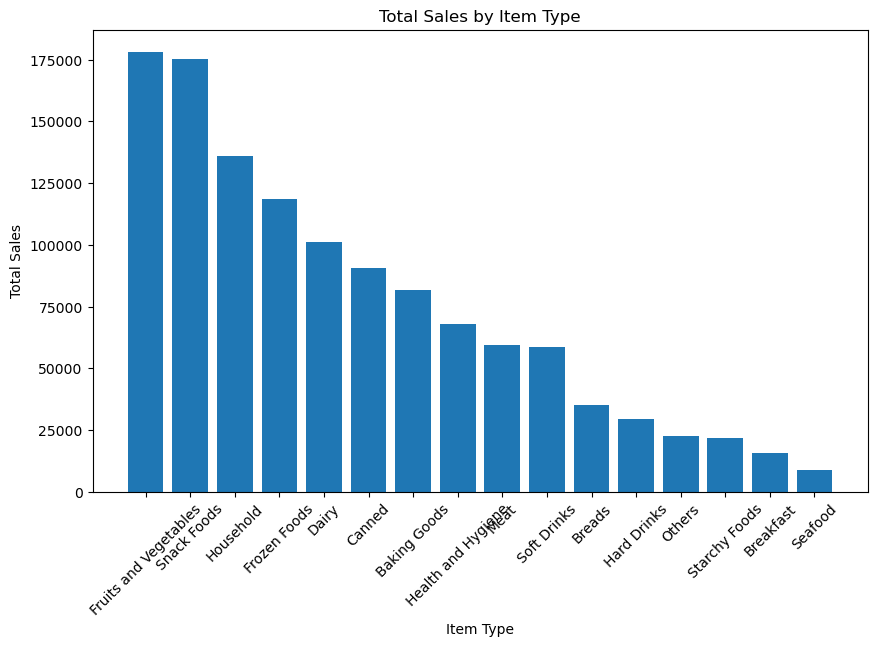

In [24]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending= False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = 45)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.show()

<h5 style="text-align:left; color:black;"><b>Fat Content by Outlets for Total Sales</b></h5>

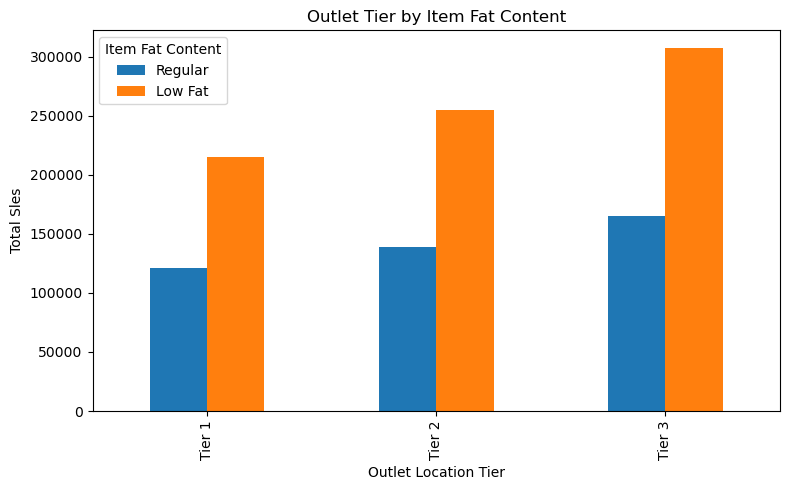

In [25]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind = 'bar', figsize=(8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sles')
plt.legend(title= 'Item Fat Content')
plt.tight_layout()
plt.show()

<h5 style="text-align:left; color:black;"><b>Fat Content by Outlet for Total Sales</b></h5>

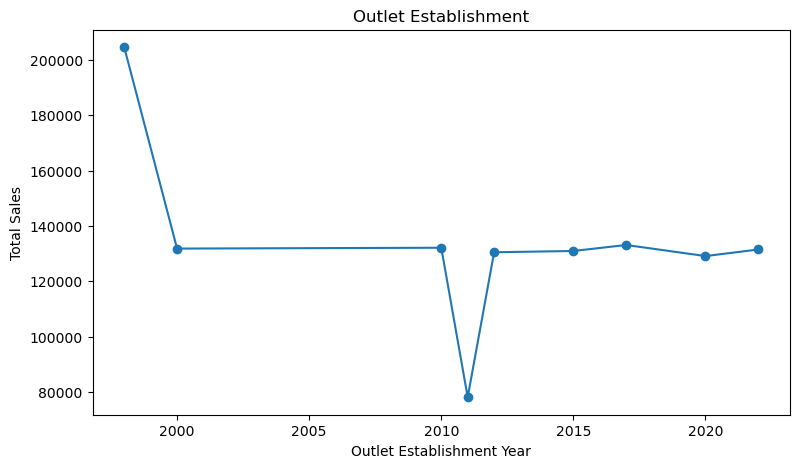

In [27]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle= '-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

plt.show()

<h5 style="text-align:left; color:black;"><b>Sales by Outlet Size</b></h5>

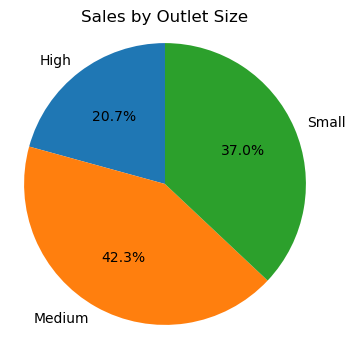

In [29]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels= sales_by_size.index,
       autopct= "%.1f%%",
       startangle = 90)
plt.title('Sales by Outlet Size')
plt.axis('equal')
plt.show()

<h5 style="text-align:left; color:black;"><b>Sales by Outlet Location</b></h5>

In [ ]:
sales_by_location = df.groupby('Outlet Location')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels= sales_by_size.index,
       autopct= "%.1f%%",
       startangle = 90)
plt.title('Sales by Outlet Size')
plt.axis('equal')
plt.show()